In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from PIL import Image
%matplotlib inline


In [2]:
from tensorflow.keras.models import load_model

In [3]:
#CHOOSE MODEL BY COMMENT/UNCOMMENT
#standard model
model = load_model("./modele/Model2_4cat_aug_init_densReg.h5")
#fine-tunning model
#model_FT = load_model("./modele/FT_vgg16_1.h5")

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 108, 108, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 104, 104, 32)      9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 102, 102, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 64)       

In [11]:
#load filenames from folder
image_path = "./sample_images/"
file_names = os.listdir(image_path)


In [12]:
def predict(np_sample_image):
    #class labels
    labels = {0:"Asfalt", 1:"Kostka", 2:"Polna", 3:"Utwardzona"}
    #model prediction return as one-hot encoding
    one_hot_prediction = model.predict(np_sample_image)
    #class prediction number
    prediction = np.argmax(one_hot_prediction,axis=1)
    predicted_class = labels[prediction[0]]
    return predicted_class

In [16]:
#load files
images = []
for file in file_names:
    #load image from disk
    image = Image.open(image_path+file)
    #convert image to NumPy array
    np_image = np.array(image)
    #correct shape from 3 to 4 dimensions (x,y,color_channels) -> (batch_size,x,y,color_channels)
    np_image = np.expand_dims(np_image, axis=0)
    #change range from 0-255 to 0-1
    np_image = np_image /255
    #add image to images list
    images.append(np_image)

'Utwardzona'

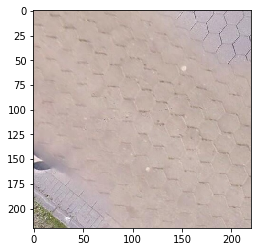

In [17]:
#show image, max 38
image_to_show = 25
#[0] is necessary to get 3 dimensional image, without added 4 dimension 
plt.imshow(images[image_to_show][0])
predict(images[image_to_show])